# Weight and combine the chunk velocities

Bla blub

In [1]:
# Automatic reloading of imports
%load_ext autoreload
%autoreload 2

import sys
import os
import matplotlib.pyplot as plt

sys.path.append('/home/paul/pyodine/')

import pyodine
import pyodine_combine_vels

Timeseries parameter object:

In [2]:
import utilities_song as utilities

Pars = utilities.timeseries_parameters.Timeseries_Parameters()

In [4]:
# Individual result files to use
parent_dir = '/home/paul/data_song2/data_res/sigdra_obs/'
res_files = [os.path.join(parent_dir, f, 'sigdra_res1.h5') for f in os.listdir(parent_dir)]
res_files.sort()

# The directory for analysis plots
plot_dir = '/home/paul/data_song2/data_res/sigdra_obs/vel_combined'

# The diagnosis file to write analysis info into
diag_file = os.path.join(plot_dir, 'diag_file.log')

# The output name of the CombinedResults object
comb_res_out = os.path.join(plot_dir, 'sigdra_combined.h5')

# The output name of the velocity results text file
vels_out = os.path.join(plot_dir, 'sigdra.vels')

In [6]:
Results = pyodine_combine_vels.combine_velocity_results(
    Pars, res_files=res_files, diag_file=diag_file, plot_dir=plot_dir, 
    comb_res_out=comb_res_out, vels_out=vels_out)

Non-existing files:
/home/paul/data_song2/data_res/sigdra_obs/vel_combined/sigdra_res1.h5
---------------------------------------------------
- Pyodine chunk combination (based on iSONG code) -
---------------------------------------------------

Weighting parameters used:
	good_chunks	3	4	5	6	7	8	9	10	11	12	13	14	
	good_orders	6	7	8	9	10	11	12	13	
	sig_limit_low	4.0
	sig_limit_up	1000.0
	sig_correct	1000.0
	reweight_alpha	1.8
	reweight_beta	8.0
	reweight_sigma	2.0
	weight_correct	0.01

Nr. of obs, chunks per obs: 20, 528

Chunk-to-chunk offsets from observation mean:
Median: -9.95 +- 830.62

Chunk sigmas:
Median: 45.97 +- 154.49

RV quality factor 1 ( sqrt(1/sum(1/sig**2)) ): 1.6396876050001081 m/s
RV quality factor 2 ( sqrt(1/sum(med(wt1))) ): 1.6396902508898112 m/s

Saving results to:
	/home/paul/data_song2/data_res/sigdra_obs/vel_combined/sigdra_combined.h5

Creating and saving analysis plots to
	/home/paul/data_song2/data_res/sigdra_obs/vel_combined:

Observations with outlier RVs

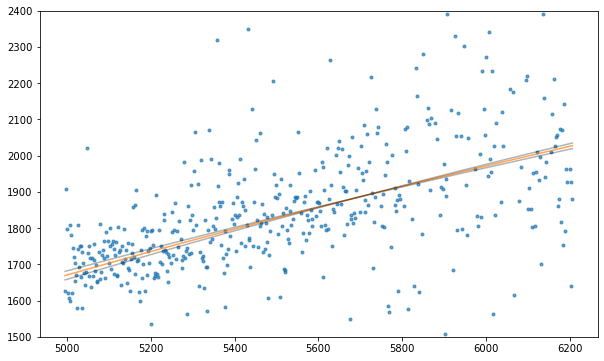

In [7]:
obs_ind = 10
velocities_fit = pyodine.timeseries.combine_vels.velocity_from_chromatic_index(
    Results.params['wave_intercept'][obs_ind], Results.rv[obs_ind], Results.RV_wave[obs_ind], Results.crx[obs_ind])
velocities_fit_lower = pyodine.timeseries.combine_vels.velocity_from_chromatic_index(
    Results.params['wave_intercept'][obs_ind], Results.rv[obs_ind]-Results.rv_err[obs_ind], 
    Results.RV_wave[obs_ind]-Results.RV_wave_err[obs_ind], Results.crx[obs_ind]-Results.crx_err[obs_ind])
velocities_fit_upper = pyodine.timeseries.combine_vels.velocity_from_chromatic_index(
    Results.params['wave_intercept'][obs_ind], Results.rv[obs_ind]+Results.rv_err[obs_ind], 
    Results.RV_wave[obs_ind]+Results.RV_wave_err[obs_ind], Results.crx[obs_ind]+Results.crx_err[obs_ind])

fig = plt.figure(figsize=(10,6))
plt.plot(Results.params['wave_intercept'][obs_ind], Results.params['velocity'][obs_ind], '.', alpha=0.7)
plt.plot(Results.params['wave_intercept'][obs_ind], velocities_fit, alpha=0.7)
plt.plot(Results.params['wave_intercept'][obs_ind], velocities_fit_lower, 'k', alpha=0.3)
plt.plot(Results.params['wave_intercept'][obs_ind], velocities_fit_upper, 'k', alpha=0.3)
plt.ylim(1500., 2400.)
plt.show()
plt.close()